<a href="https://colab.research.google.com/github/yyyyolo1/graduation-design/blob/main/Supermarket_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  <font size="+3" color='#154085'> <b> 1. Dataset Understanding


### <font size="+2" color='#154085'>**1.1 The context of dataset**



This project's dataset originates from Company XYZ's nationwide supermarket chain in Nigeria. It is an open-source dataset that includes three months of sales data recorded by the company's major branches in three principal cities (Lagos, Abuja, and Port Harcourt) across the country. Each branch's data file contains the same attribute information. Due to increasing competition among supermarkets, the dataset is compiled to assist the company in understanding sales trends and determining its growth. We have uploaded the dataset to Kaggle for downloading needs: https://www.kaggle.com/datasets/xinyiwangnoctis/supermarket-sales-dataset/.

### <font size="+2" color='#154085'>**1.2 Domain-specific knowledge to interpret the data**

The data displays sales and profit information across different branches and product lines, as well as sales trends over various time periods, such as months and weeks. Our analysis aims to understand the impact of customer types and payment methods on sales and to enhance customer satisfaction. Through these analyses, our goal is to improve products and services to attract and retain customers, identify peak sales periods, and optimize human resources and inventory management.

There is some domain-specific knowledge to better interpret the data.

1.   Retail Operations and Management
- Sales Strategy:
Developing pricing strategies, discount schemes, and understanding how different product lines perform relative to each other.
- Customer Flow Management:
Analyzing the data to determine peak shopping hours, which can help in staffing decisions and operational planning to enhance the shopping experience.
2.   Marketing and Customer Behavior
- Consumer Buying Behavior: Understanding patterns in how different demographics (such as gender or customer type) influence purchasing decisions.
- Loyalty Programs: Evaluating the effectiveness of loyalty programs (e.g., Member vs. Normal customers in the dataset) in increasing customer retention and spend.
3. Financial Analysis in Retail
- Profitability Metrics: Understanding metrics such as unit price, tax 5% and gross income, and how they are calculated from retail transactions.
- Cost of Goods Sold (COGS): Knowing how to calculate and interpret COGS, which is vital for assessing product profitability.


### <font size="+2" color='#154085'>**1.3 Interpretation of dataset variables**

*   **Invoice ID**: Customer identification number
*   **Branch**: Supermarket branches across the country - (A, B, C).   
*   **City**: The location of supermarket
*   **Customer Type**: Type of customers   
Members - Returning customer with membership card,   
Normal - Customer
without membership (could be first-time or walk-in customer)
*   **Gender**: Customer Gender Information
*   **Product line**: Product categorization groups - Electronic accessories, Fashion accessories,   
Food and beverages, Health and beauty, Home and lifestyle, Sports and travel


*  **Unit Price**: Price of each product in Naira


*   **Quantity**: Number of products purchased by customer





*   **Tax**: 5% tax fee for customer buying
*   **Total**: Total income of one produce, including tax (Unit Price * Quantity + Tax)


*   **Date**: Date of purchase (Supermarket Record available from January 2019 to March 2019)

*   **Time**: Purchase time (Supermarket Hours - 10am to 9pm)



*   **Payment**: Payment used by customer for purchase (3 methods are available – Cash, Card and Epay)
*   **COGS**: Cost of goods sold



*   **Gross margin percentage**: Gross margin percentage
*   **Gross income**: Gross income


*   **Rating**: Customer satisfaction rating on their overall shopping experience (On a scale of 1 to 10)


















### <font size="+2" color='#154085'>**1.4 Potential data quality issues**

*   **Data Integrity**: Are all values especially key values like "Invoice ID", "Total" and "Payment" populated? It is necessary to verify whether missing values exist to ensure data integrity.


*  **Outliers**: Does the data set contain outliers? Some fields like "Quantity" and "Total" may contain outliers, which could impact overall analysis results.


*   **Data Consistency**: Are the variables in the dataset consistent? Check whether categorical data such as "Customer type" and "Payment" are used consistently across the dataset.


*  **Data Format**: Are the variables in the dataset standardized? Ensure that all variables, such as "date" and "time", follow a consistent and standardized format, which facilitates time series analysis.




##  <font size="+3" color='#154085'> <b> 2. Preliminaries

### <font size="+2" color='#154085'>**2.1 Data loading and merging**

### <font size="+2" color='#154085'>Load the csv files of each branch


In [1]:
# Import required libraries
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import os
import sys
warnings.filterwarnings('ignore')

In [2]:
# Before this step, we need to add the csv files to the 'content' path of colab
abuja_data = pd.read_csv('/content/Abuja_Branch.csv')
lagos_data = pd.read_csv('/content/Lagos_Branch.csv')
port_harcourt_data = pd.read_csv('/content/Port_Harcourt_Branch.csv')


### <font size="+2" color='#154085'>View the top five rows of each branch



In [3]:
# print results
print("Abuja Branch Data Preview:")
print(abuja_data.head())

print("\nLagos Branch Data Preview:")
print(lagos_data.head())

print("\nPort Harcourt Branch Data Preview:")
print(port_harcourt_data.head())


Abuja Branch Data Preview:
    Invoice ID Branch   City Customer type  Gender            Product line  \
0  692-92-5582      B  Abuja        Member  Female      Food and beverages   
1  351-62-0822      B  Abuja        Member  Female     Fashion accessories   
2  529-56-3974      B  Abuja        Member    Male  Electronic accessories   
3  299-46-1805      B  Abuja        Member  Female       Sports and travel   
4  319-50-3348      B  Abuja        Normal  Female      Home and lifestyle   

   Unit price  Quantity    Tax 5%      Total       Date   Time Payment  \
0     19742.4         3   2961.36   62188.56  2/20/2019  13:27    Card   
1      5212.8         4   1042.56   21893.76   2/6/2019  18:07    Epay   
2      9183.6         4   1836.72   38571.12   3/9/2019  17:03    Cash   
3     33739.2         6  10121.76  212556.96  1/15/2019  16:19    Cash   
4     14508.0         2   1450.80   30466.80  3/11/2019  15:30    Epay   

       cogs  gross margin percentage  gross income  Rating 

**Observation:** We view the first 5 rows of each branch to verify whether the data is read correctly and get a preliminary understanding of the content and value range of each column. It can be observed that the column name and data type of each column conform to the description of the dataset variables. Considering the consistency of column names, we merge the data of the three branches.

### <font size="+2" color='#154085'>Merging the csv files to get our dataset

In [4]:
combined_data = pd.concat([abuja_data, lagos_data, port_harcourt_data], ignore_index=True)

# We replace the original A, B, and C in the 'Branch' column with the corresponding city names for a clearer presentation.
abuja_data['Branch'] = 'Abuja'
lagos_data['Branch'] = 'Lagos'
port_harcourt_data['Branch'] = 'Port Harcourt'

combined_data = pd.concat([abuja_data, lagos_data, port_harcourt_data], ignore_index=True)


### <font size="+2" color='#154085'>**2.2 Check the structure and content of our dataset**


In [5]:
combined_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,692-92-5582,Abuja,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2/20/2019,13:27,Card,59227.2,4.761905,2961.36,5.9
1,351-62-0822,Abuja,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2/6/2019,18:07,Epay,20851.2,4.761905,1042.56,4.5
2,529-56-3974,Abuja,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,3/9/2019,17:03,Cash,36734.4,4.761905,1836.72,6.8
3,299-46-1805,Abuja,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,1/15/2019,16:19,Cash,202435.2,4.761905,10121.76,4.5
4,319-50-3348,Abuja,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,3/11/2019,15:30,Epay,29016.0,4.761905,1450.80,4.4


from matplotlib import pyplot as plt
_df_0['Unit price'].plot(kind='hist', bins=20, title='Unit price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Quantity'].plot(kind='hist', bins=20, title='Quantity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Tax 5%'].plot(kind='hist', bins=20, title='Tax 5%')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Total'].plot(kind='hist', bins=20, title='Total')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Invoice ID').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Customer type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('Product line').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Unit price', y='Quantity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='Quantity', y='Tax 5%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='Tax 5%', y='Total', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='Total', y='cogs', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Unit price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Invoice ID')):
  _plot_series(series, series_name, i)
  fig.legend(title='Invoice ID', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Unit price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Unit price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Customer type')):
  _plot_series(series, series_name, i)
  fig.legend(title='Customer type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Unit price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Unit price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='Gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Unit price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Unit price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Product line')):
  _plot_series(series, series_name, i)
  fig.legend(title='Product line', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Unit price')

from matplotlib import pyplot as plt
_df_16['Unit price'].plot(kind='line', figsize=(8, 4), title='Unit price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['Quantity'].plot(kind='line', figsize=(8, 4), title='Quantity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['Tax 5%'].plot(kind='line', figsize=(8, 4), title='Tax 5%')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['Total'].plot(kind='line', figsize=(8, 4), title='Total')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Customer type'].value_counts()
    for x_label, grp in _df_20.groupby('Invoice ID')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Invoice ID')
_ = plt.ylabel('Customer type')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Gender'].value_counts()
    for x_label, grp in _df_21.groupby('Customer type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Customer type')
_ = plt.ylabel('Gender')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Product line'].value_counts()
    for x_label, grp in _df_22.groupby('Gender')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Gender')
_ = plt.ylabel('Product line')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Date'].value_counts()
    for x_label, grp in _df_23.groupby('Product line')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Product line')
_ = plt.ylabel('Date')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['Invoice ID'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='Unit price', y='Invoice ID', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['Customer type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='Unit price', y='Customer type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='Unit price', y='Gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_27['Product line'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_27, x='Unit price', y='Product line', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [6]:
combined_data.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,148-41-7930,Port Harcourt,Port Harcourt,Normal,Male,Health and beauty,35985.6,7,12594.96,264494.16,1/23/2019,10:33,Cash,251899.2,4.761905,12594.96,6.1
996,189-40-5216,Port Harcourt,Port Harcourt,Normal,Male,Electronic accessories,34693.2,7,12142.62,254995.02,1/9/2019,11:40,Cash,242852.4,4.761905,12142.62,6.0
997,267-62-7380,Port Harcourt,Port Harcourt,Member,Male,Electronic accessories,29642.4,10,14821.20,311245.20,3/29/2019,19:12,Epay,296424.0,4.761905,14821.20,4.3
998,652-49-6720,Port Harcourt,Port Harcourt,Member,Female,Electronic accessories,21942.0,1,1097.10,23039.10,2/18/2019,11:40,Epay,21942.0,4.761905,1097.10,5.9
999,233-67-5758,Port Harcourt,Port Harcourt,Normal,Male,Health and beauty,14526.0,1,726.30,15252.30,1/29/2019,13:46,Epay,14526.0,4.761905,726.30,6.2


**Observation:** We use combined_data.head() and combined_data.tail() view the top/bottom five rows of our dataset. We can see that our dataset has been loaded successfully.

In [7]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

**Observation:** We use .info() to understand the data type, memory usage, and whether there are missing values in the merged dataset. We can see that there are 1000 samples in total, each sample has 17 features, and the data types are float64, int64, and object. There are no missing values. This provides a basic overview for our next step: data preprocessing.

In [8]:
combined_data.describe()


,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,20041.966800,5.510000,5536.572840,116268.029640,110731.456800,4.761905,5536.572840,6.97270
std,9538.066205,2.923431,4215.177173,88518.720636,84303.543463,0.000000,4215.177173,1.71858
min,3628.800000,1.000000,183.060000,3844.260000,3661.200000,4.761905,183.060000,4.00000
25%,11835.000000,3.000000,2132.955000,44792.055000,42659.100000,4.761905,2132.955000,5.50000
50%,19882.800000,5.000000,4351.680000,91385.280000,87033.600000,4.761905,4351.680000,7.00000
75%,28056.600000,8.000000,8080.290000,169686.090000,161605.800000,4.761905,8080.290000,8.50000
max,35985.600000,10.000000,17874.000000,375354.000000,357480.000000,4.761905,17874.000000,10.00000


**Observation:** We use .describe() to view the basic statistics for each numeric column. The explanation of each parameter in the result is as follows:

1. count: The number of non-null values. Indicates how many non-missing values ​​there are in the column.

2. mean: The average of all values, that is, the sum of the values ​​divided by the number of values.

3. std: The degree of dispersion of the distribution of values. The standard deviation is the square root of the variance, reflecting the average distance of the data points from the mean.

4. min: The minimum value in the data set.

5. 25% Quartile: 25% of the values ​​in the data set are less than or equal to this value.

6. 50% Quartile/Median: 50% of the values ​​in the data set are less than or equal to this value, that is, the median.

7. 75% Quartile: 75% of the values ​​in the data set are less than or equal to this value.

8. max: The maximum value in the data set.

This step helps us identify outliers, understand the range (minimum & maximum values) and distribution (quartiles) of the data, which is crucial for our data preprocessing. In addition, we notice that the standard deviation of the 'gross margin percentage' feature is 0, which we believe is due to the uniform profit setting of each supermarket. Therefore, we ignore the ‘gross profit margin percentage’ in the subsequent analysis.

##  <font size="+3" color='#154085'> <b>3. Data Preprocessing


### <font size="+2" color='#154085'>**3.1 Encode categorical variables, handle Date features, standardize numerical features, fill missing values if any, remove duplicate rows**

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Create a label encoder and normalizer
encoder = LabelEncoder()
scaler = StandardScaler()

# Label encoding for the specified categorical features
for col in ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']:
    combined_data[col] = encoder.fit_transform(combined_data[col])

# Handling Date features
combined_data['Date'] = pd.to_datetime(combined_data['Date'])
combined_data['Year'] = combined_data['Date'].dt.year
combined_data['Month'] = combined_data['Date'].dt.month
combined_data['Day'] = combined_data['Date'].dt.day

# Standardizing numerical features
numerical_cols = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating']
combined_data[numerical_cols] = scaler.fit_transform(combined_data[numerical_cols])

# Filling missing values ​​for numerical features if any
if combined_data[numerical_cols].isnull().sum().sum() > 0:
  imputer = SimpleImputer(strategy='mean')
  combined_data[numerical_cols] = imputer.fit_transform(combined_data[numerical_cols])

# Remove duplicate rows
combined_data.drop_duplicates(inplace=True)

# Print results
print(combined_data.head())
print(combined_data.tail())


    Invoice ID  Branch  City  Customer type  Gender  Product line  Unit price  \
0  692-92-5582       0     0              0       0             2   -0.031423   
1  351-62-0822       0     0              0       0             1   -1.555513   
2  529-56-3974       0     0              0       1             0   -1.138994   
3  299-46-1805       0     0              0       0             5    1.436778   
4  319-50-3348       0     0              1       0             4   -0.580488   

   Quantity    Tax 5%     Total       Date   Time  Payment      cogs  \
0 -0.859010 -0.611244 -0.611244 2019-02-20  13:27        0 -0.611244   
1 -0.516775 -1.066684 -1.066684 2019-02-06  18:07        2 -1.066684   
2 -0.516775 -0.878185 -0.878185 2019-03-09  17:03        1 -0.878185   
3  0.167695  1.088325  1.088325 2019-01-15  16:19        1  1.088325   
4 -1.201245 -0.969785 -0.969785 2019-03-11  15:30        2 -0.969785   

   gross margin percentage  gross income    Rating  Year  Month  Day  
0        

**Observation:** We clean the dataset using data preprocessing technologies. Specifically, we encode categorical variables, transform date features, standardize numerical variables, and remove redundant samples. For any missing values, we fill them with the mean value. We output the top five rows and the bottom five rows of the processed dataset. It can be seen that the six categorical variables 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment' have been correctly encoded as numeric variables. The date feature has been correctly stored as 'year', 'month' and 'day'. The eight numeric variables 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating' have been correctly standardized. There are no missing values ​​or duplicate rows in the dataset.

In [10]:
# Check the information of the dataset after preprocessing
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   int64         
 2   City                     1000 non-null   int64         
 3   Customer type            1000 non-null   int64         
 4   Gender                   1000 non-null   int64         
 5   Product line             1000 non-null   int64         
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   float64       
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [11]:
# Check whether there are missing values in the dataset
combined_data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Year                       0
Month                      0
Day                        0
dtype: int64

**Observation:** It can be seen that each feature has the correct data type and there are no missing values after preprocessing.

### <font size="+2" color='#154085'>**3.2 Handling outliers**

### <font size="+2" color='#154085'>Detect outliers in numerical variables

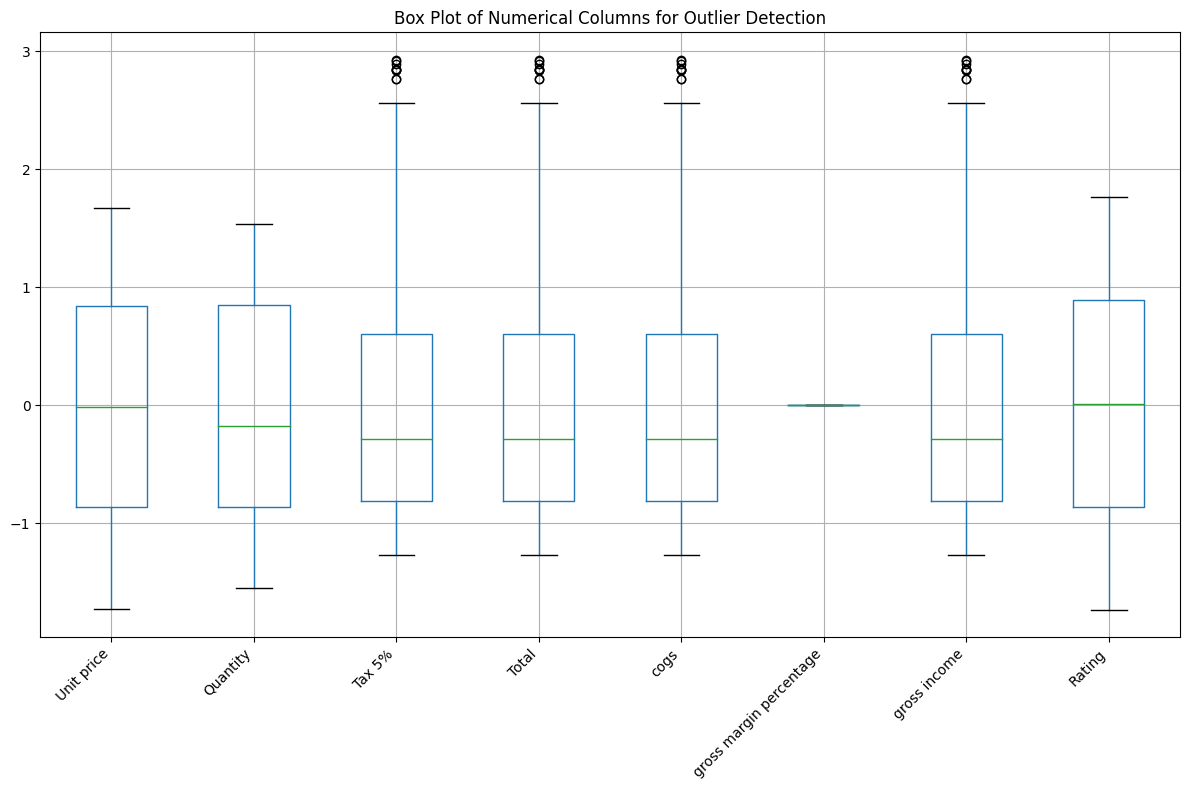

In [12]:
# Create a new figure window with a specified size
plt.figure(figsize=(12, 8))

# Assuming 'combined_data' is a DataFrame and 'numerical_cols' contains the names of numerical columns
combined_data.boxplot(column=numerical_cols)
# Add a descriptive title to the figure
plt.title('Box Plot of Numerical Columns for Outlier Detection')

# Rotate and align the x-axis labels (column names) for better readability
plt.xticks(rotation=45, ha='right')

# Adjust the layout to ensure adequate spacing between plot elements
plt.tight_layout()

# Display the generated boxplot on the screen
plt.show()


**Observation:** From the box plot, we can see that most columns have a symmetrical distribution with no outliers. However, the 'Tax 5%', 'Total', 'cogs', and 'gross income' columns show obvious outliers and therefore require special attention.

### <font size="+2" color='#154085'>Remove outliers that are above the upper bound & below the lower bound

In [13]:
# Loop through each numerical column
for col in numerical_cols:
    # Calculate the first quartile (Q1)
    Q1 = combined_data[col].quantile(0.25)
    # Calculate the third quartile (Q3)
    Q3 = combined_data[col].quantile(0.75)
    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1
    # Calculate the lower bound for outliers
    lower_bound = Q1 - 1.5 * IQR
    # Calculate the upper bound for outliers
    upper_bound = Q3 + 1.5 * IQR
    # Filter out rows where the column values are within the lower and upper bounds
    combined_data = combined_data[(combined_data[col] >= lower_bound) & (combined_data[col] <= upper_bound)]


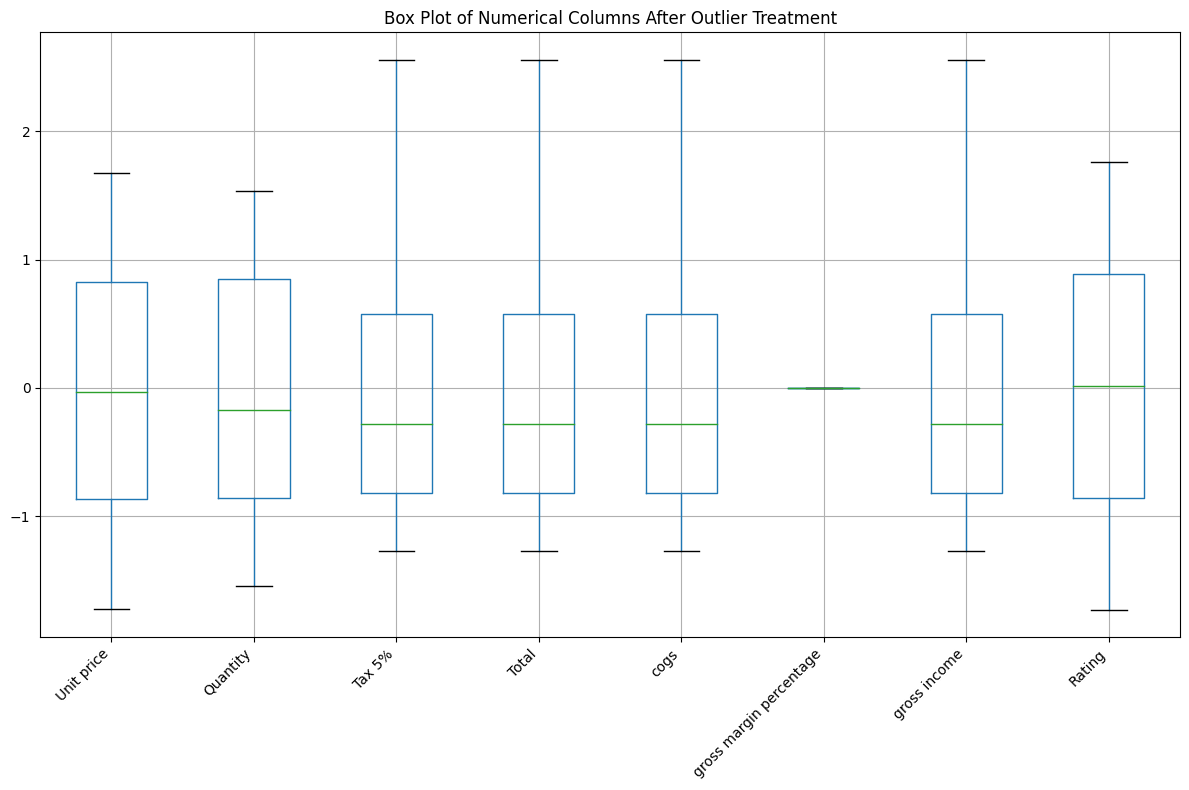

In [14]:
# Importing necessary libraries
import matplotlib.pyplot as plt

# Setting the size of the plot
plt.figure(figsize=(12, 8))

# Creating a box plot of numerical columns in combined_data DataFrame
# where numerical_cols contains the list of numerical column names
combined_data.boxplot(column=numerical_cols)

# Setting the title of the plot
plt.title('Box Plot of Numerical Columns After Outlier Treatment')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjusting the layout of the plot to prevent overlapping of elements
plt.tight_layout()

# Display
plt.show()


**Observation:** After we remove the outliers that are above the upper bound & below the lower bound, we can see from the box plot that the numerical features are reasonably distributed.

### <font size="+2" color='#154085'>Detect outliers in categorical variables

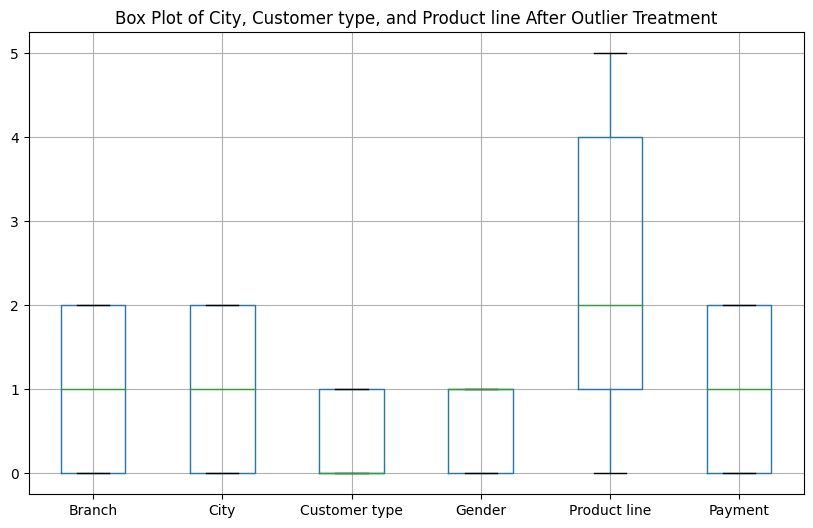

In [15]:
# Setting the size of the figure to 10 inches by 6 inches
plt.figure(figsize=(10, 6))

# Creating box plots for the 'City', 'Customer type', and 'Product line' columns from the combined_data DataFrame
combined_data.boxplot(column=['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment'])

# Setting the title of the plot
plt.title('Box Plot of City, Customer type, and Product line After Outlier Treatment')

# Display
plt.show()

**Observation:** We conduct outlier detection on six categorical variables: 'Branch', 'city', 'Customer type', 'Gender', 'Product line', and 'Payment'. It can be seen that the data of each city is distributed between 0 and 2, which is consistent with branch. The customer types and genders are mainly concentrated between 0 and 1, while the product line has a wide range of distribution from 0 to 5. Payment is concentrated between 0 and 2. There are no significant outliers. In general, the distribution such as cities and customer types is more concentrated, while the product lines show greater diversity. **This information helps us to understand the distribution of different variables and provides a basis for further business analysis and decision making. Now we can perform Exploratory Data Analysis (EDA).**

##  <font size="+3" color='#154085'> <b>4. Exploratory Data Analysis (EDA)

### <font size="+2" color='#154085'>**4.1 Univariate analysis**

In [16]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### <font size="+2" color='#154085'>**4.1.1 Analyze  numerical variable 'Total'  using histograms and box plots**

### <font size="+2" color='#154085'>Histograms

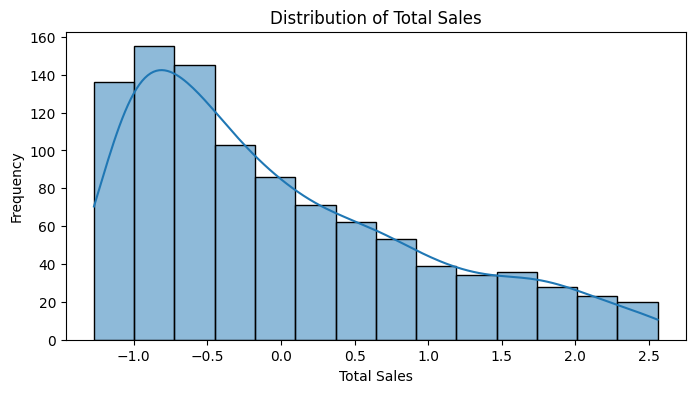

In [17]:

plt.figure(figsize=(8, 4))
sns.histplot(combined_data['Total'], kde=True) # Create a histogram with a kernel density estimate for the 'Total' column in 'combined_data'
plt.title('Distribution of Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.show()


**Observation**: Here, we analyze the distribution of total sales, and we can see from the histogram and kernel density estimation curve that the distribution of total sales is right-skewed, with the highest frequency concentrated in the negative part (around -1.0), and then the number of records gradually decreases as sales increase. Most of the sales are concentrated between -1.2 and 1.0, showing the characteristics of the small amount of most transactions. **This indicates that the majority of sales transactions of enterprises are of low amount, and transactions of higher amount are relatively few.**

### <font size="+2" color='#154085'>Box plots

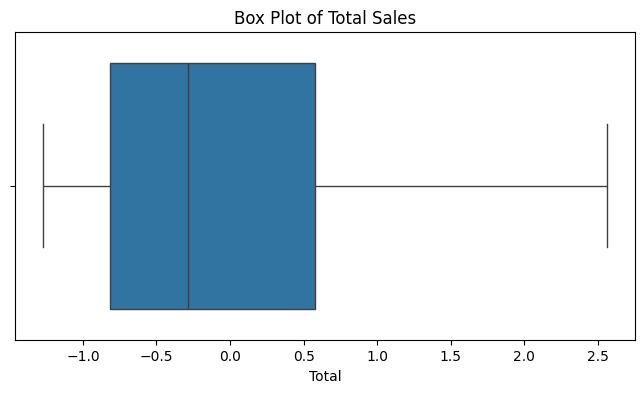

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=combined_data['Total'])
plt.title('Box Plot of Total Sales')
plt.show()


**Observation:** Take a closer look at the distribution of total sales from the box plot. The plot shows that the median of total sales (the horizontal line in the middle) is about -0.3. This means that among all sales, the portion below 0 is slightly larger than the portion above 0. The interquartile range (IQR) ranges from  -0.8 to 0.6, indicating that the middle 50% of the data falls within this range. The minimum and maximum values are close to -1.3 and 2.5, respectively, indicating large data variation. **Overall, the total sales data is widely distributed, with the majority of the data concentrated between -0.8 and 0.6. Through this graph, the enterprise can see that most of the sales are at a low level and a few transactions have higher sales.**


### <font size="+2" color='#154085'>In-depth analysis: Visualize the total sales of the three branches

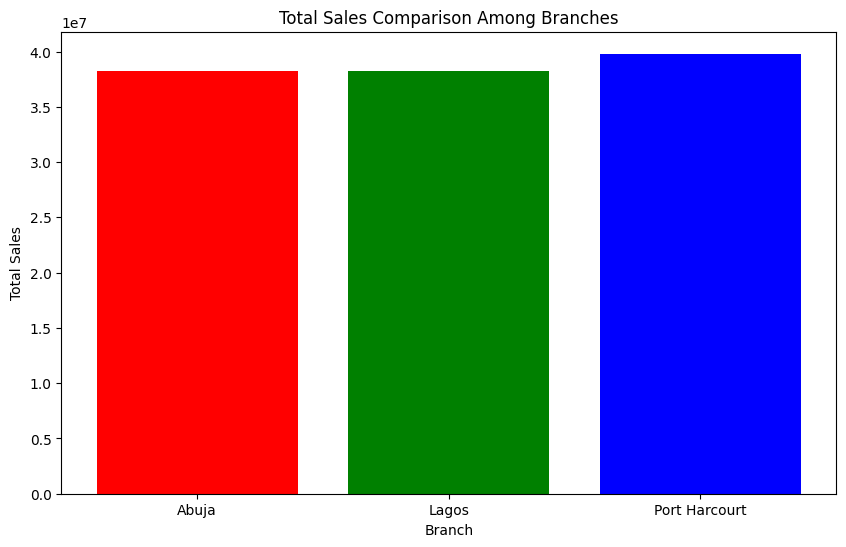

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


abuja_data = pd.read_csv('/content/Abuja_Branch.csv')
lagos_data = pd.read_csv('/content/Lagos_Branch.csv')
port_harcourt_data = pd.read_csv('/content/Port_Harcourt_Branch.csv')

# Calculate the total sales for each branch
abuja_total_sales = abuja_data['Total'].sum()
lagos_total_sales = lagos_data['Total'].sum()
port_harcourt_total_sales = port_harcourt_data['Total'].sum()

# Create a dictionary with the total sales data for each branch
sales_data = {
    'Abuja': abuja_total_sales,
    'Lagos': lagos_total_sales,
    'Port Harcourt': port_harcourt_total_sales
}

# Convert the dictionary into a DataFrame with columns 'Branch' and 'Total Sales'
sales_df = pd.DataFrame(list(sales_data.items()), columns=['Branch', 'Total Sales'])

# Create a bar chart with custom colors for each branch
plt.figure(figsize=(10, 6))
plt.bar(sales_df['Branch'], sales_df['Total Sales'], color=['red', 'green', 'blue'])
plt.title('Total Sales Comparison Among Branches')
plt.xlabel('Branch')
plt.ylabel('Total Sales')
plt.show()

**Observation:** As can be seen from the graph, Port Harcourt has the highest total sales, while Abuja and Lagos have little difference in total sales, but both are lower than Port Harcourt. **This indicates that the Port Harcourt branch performs best in terms of sales, and its success factors can be further analyzed and the promotion of these strategies in other branches can be considered. At the same time, Abuja and Lagos are close in terms of sales and may need to look for more opportunities and strategies to improve their sales performance.**

### <font size="+2" color='#154085'>In-depth analysis: Visualize the total sales by time period

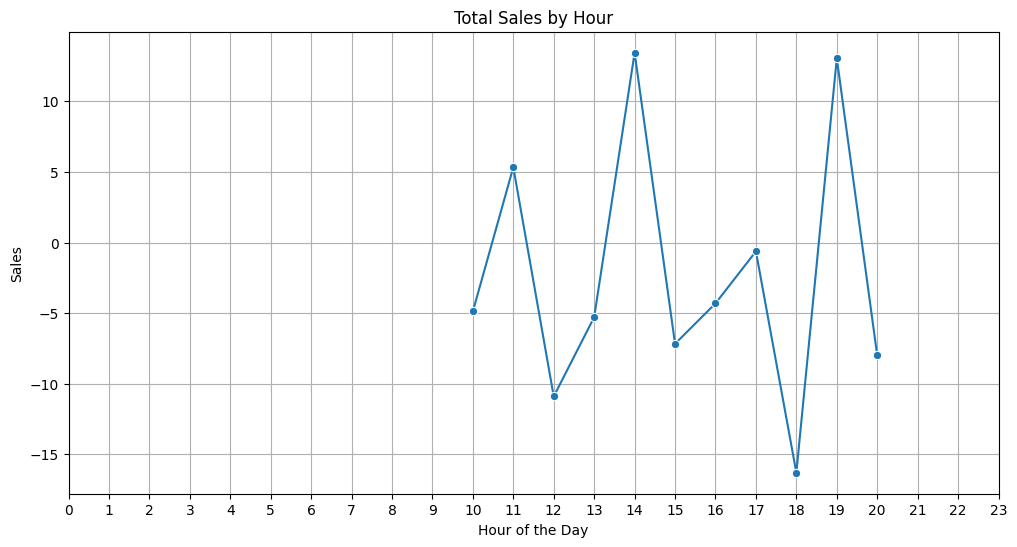

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the 'Time' column to datetime format
combined_data['Time'] = pd.to_datetime(combined_data['Time'])

# Extract the hour from the 'Time' column and add it as a new column 'Hour'
combined_data['Hour'] = combined_data['Time'].dt.hour

# Group the data by 'Hour' and calculate the total sales for each hour
sales_by_hour = combined_data.groupby('Hour')['Total'].sum().reset_index()

plt.figure(figsize=(12, 6))

# Create a line plot for total sales by hour
sns.lineplot(x='Hour', y='Total', data=sales_by_hour, marker='o')

plt.title('Total Sales by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Sales')
plt.xticks(range(24))  # Ensure x-axis has ticks for each hour from 0 to 23
plt.grid(True)

plt.show()



**Observation:** This chart shows the change in Total Sales by Hour over time. Sales fluctuated greatly in different time periods. For example, the figure shows that at hours 14 and 19, sales reach their highest values, exceeding 10. However, at the 18th hours, sales drop to a minimum below -15. The peak hours of sales are mainly concentrated in the 14th and 19th hours. These periods may be the time periods when customer purchasing activity is more frequent.  Lower sales during these periods could be due to reduced customer activity or other factors.  **Overall, the chart shows that there are significant fluctuations in sales at different times of the day. These fluctuations can be affected by a variety of factors. We speculate that local people prefer to shop before and after meals at (11:00, 14:00) and (17:00, 19:00). This insight helps us discover the living habits of local people. We can consider promotions before and after lunch & dinner to increase sales.**

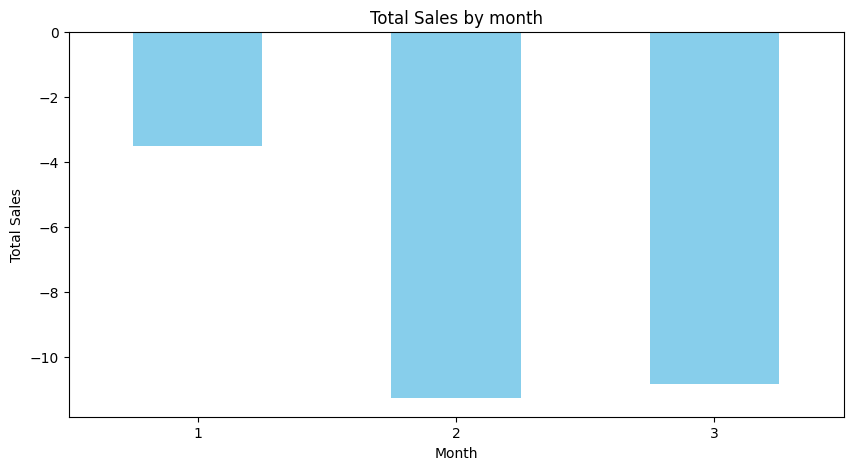

In [ ]:
import pandas as pd  # Import the pandas library

combined_data['Date'] = pd.to_datetime(combined_data['Date'])  # Convert the 'Date' column to datetime format
combined_data['Month'] = combined_data['Date'].dt.month  # Extract the month from the 'Date' column
combined_data['Weekday'] = combined_data['Date'].dt.weekday  # Extract the day of the week from the 'Date' column

monthly_sales = combined_data.groupby('Month')['Total'].sum()  # Group the data by 'Month' and sum up the 'Total' sales for each month

import matplotlib.pyplot as plt  # Import the matplotlib.pyplot module

plt.figure(figsize=(10, 5))  # Set the figure size for the plot
monthly_sales.plot(kind='bar', color='skyblue')  # Create a bar chart of monthly sales with sky blue color
plt.title('Total Sales by month')  # Set the title of the plot
plt.xlabel('Month')  # Set the x-axis label
plt.ylabel('Total Sales')  # Set the y-axis label
plt.xticks(rotation=0)  # Set the rotation of x-axis tick labels to 0 degrees
plt.show()  # Display the plot


**Observation:**As can be seen from the figure, February has the highest sales volume, followed by March and January with the lowest. The results suggest that February may have been a strong month for sales, while January was more subdued. Such seasonal sales fluctuations may be related to holiday promotions or other market factors.

### <font size="+2" color='#154085'>**4.1.2 Analyze numerical variable 'Invoice ID' using bar charts**

---



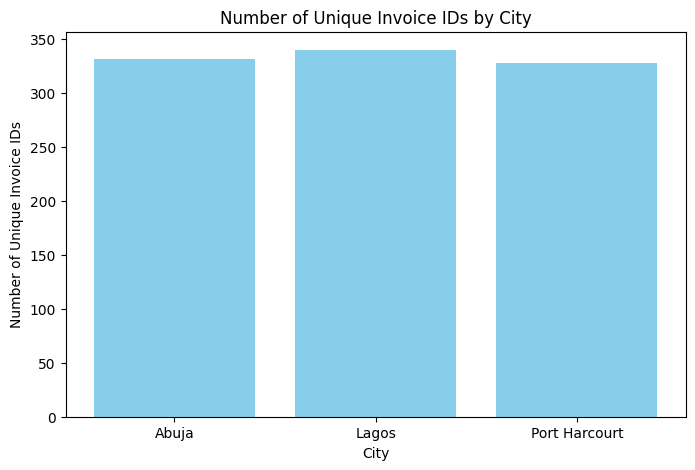

In [ ]:

import matplotlib.pyplot as plt

# Calculate the number of unique invoice IDs for each city
abuja_invoice_count = abuja_data['Invoice ID'].nunique()  # Get the count of unique 'Invoice ID' for Abuja
lagos_invoice_count = lagos_data['Invoice ID'].nunique()  # Get the count of unique 'Invoice ID' for Lagos
port_harcourt_invoice_count = port_harcourt_data['Invoice ID'].nunique()  # Get the count of unique 'Invoice ID' for Port Harcourt

plt.figure(figsize=(8, 5))
# Create a bar chart for the number of unique invoice IDs by city
plt.bar(['Abuja', 'Lagos', 'Port Harcourt'], [abuja_invoice_count, lagos_invoice_count, port_harcourt_invoice_count], color='skyblue')
plt.title('Number of Unique Invoice IDs by City')
plt.xlabel('City')
plt.ylabel('Number of Unique Invoice IDs')
plt.show()


**Observation:** We can see that Lagos has the highest number of unique invoice ids, around 340, indicating the most frequent transaction activity; Abuja was next with about 330; Port Harcourt is the least with about 320.

From the previous data analysis, we can see that Lagos City does not have the highest Total Sales, but it does have the highest overall transaction volume among the three cities. This may be because the city primarily deals in mid to low-end priced products, with fewer high-priced products. This was also confirmed in subsequent analyses.

**It is recommended to analyze the successful strategy in Lagos and promote it in other cities to increase the overall transaction volume. At the same time, the Port Harcourt market strategy should be re-evaluated to find ways to increase the volume of transactions, and through customer feedback and market research, to further enhance the volume of transactions in Port Harcourt.**

### <font size="+2" color='#154085'>**4.1.3 Analyze categorical variable 'Product line' using bar charts**



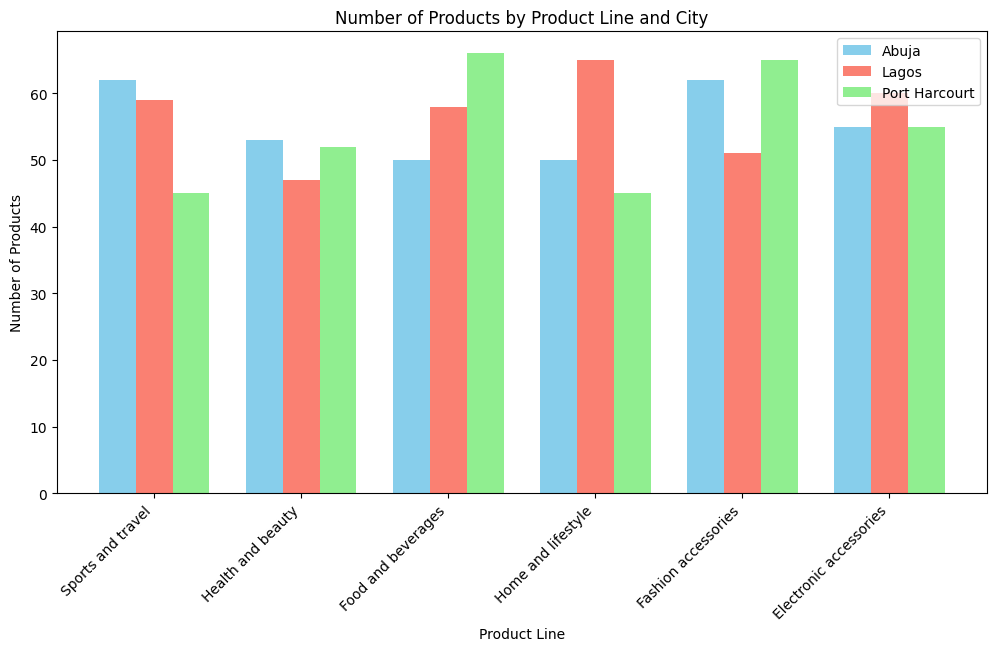

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Count the number of products for the product line in each city
abuja_product_line_count = abuja_data['Product line'].value_counts()
lagos_product_line_count = lagos_data['Product line'].value_counts()
port_harcourt_product_line_count = port_harcourt_data['Product line'].value_counts()

# Get all product lines
product_lines = list(set(abuja_product_line_count.index).union(set(lagos_product_line_count.index)).union(set(port_harcourt_product_line_count.index)))

# Set the position of the histogram
x = np.arange(len(product_lines))
width = 0.25

plt.figure(figsize=(12, 6))

# Plot bar charts for each city and adjust their position
plt.bar(x - width, [abuja_product_line_count.get(pl, 0) for pl in product_lines], width=width, color='skyblue', label='Abuja')
plt.bar(x, [lagos_product_line_count.get(pl, 0) for pl in product_lines], width=width, color='salmon', label='Lagos')
plt.bar(x + width, [port_harcourt_product_line_count.get(pl, 0) for pl in product_lines], width=width, color='lightgreen', label='Port Harcourt')

plt.title('Number of Products by Product Line and City')
plt.xlabel('Product Line')
plt.ylabel('Number of Products')
plt.xticks(x, product_lines, rotation=45, ha='right')
plt.legend()
plt.show()


**Observation:** This bar chart shows the distribution of the number of product lines in the three cities of Abuja, Lagos and Port Harcourt. The detailed analysis is as follows: Fashion accessories are mainly sold in Port Harcourt (green) with the largest number of about 65 pieces. Sports and tourism products are mainly sold in Abuja and in greater quantity. food and beverages are the most in port Harcourt, family and life are the most in Lagos, health and beauty are the least in Lagos, the other two cities are roughly equal, and electronics are the most in Lagos and not much different in the other two cities. **This difference in product line distribution means that we can consider the best-selling products in each city for sales planning in order to reasonably reduce costs and increase profits.**


### <font size="+2" color='#154085'>**4.1.4 Analyze numerical variable 'Unit price' using histograms**


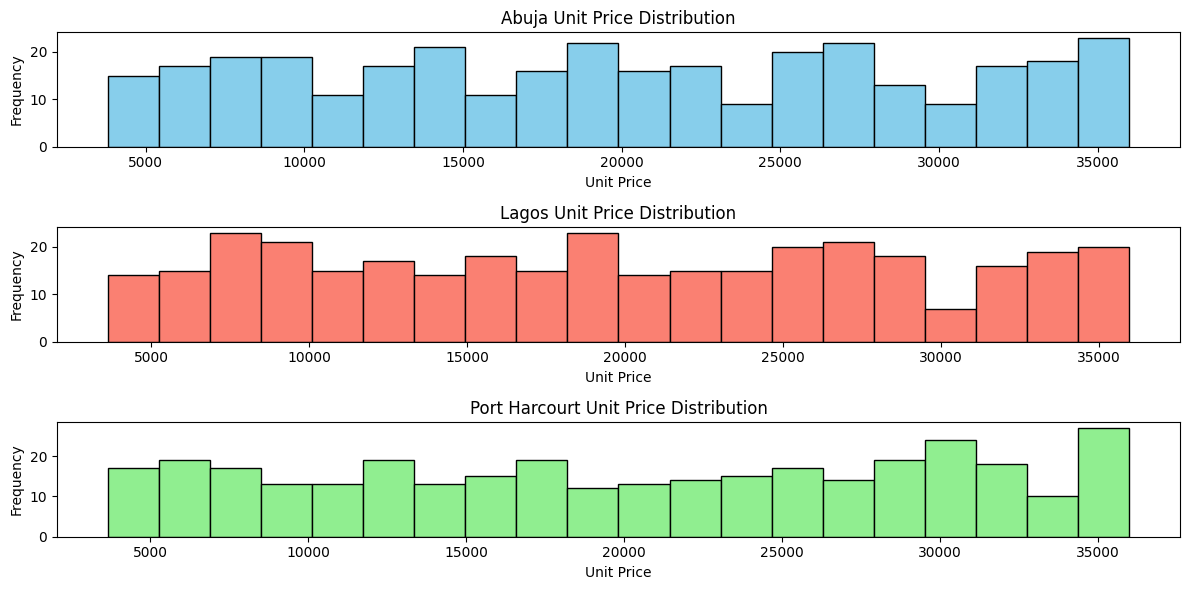

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot the distribution of unit prices for different cities using different subplots
plt.subplot(3, 1, 1)
plt.hist(abuja_data['Unit price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Abuja Unit Price Distribution')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')

plt.subplot(3, 1, 2)
plt.hist(lagos_data['Unit price'], bins=20, color='salmon', edgecolor='black')
plt.title('Lagos Unit Price Distribution')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
plt.hist(port_harcourt_data['Unit price'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Port Harcourt Unit Price Distribution')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



**Observation:** It can be seen from the figure that there are some differences in the distribution of unit prices in the three cities of Abuja, Lagos and Port Harcourt. The unit price of the three cities is between 5000 and 35,000. The lowest frequency of the unit price of Port Harcourt is between 30000 and 35,000, while the lowest frequency of the other two cities is between 30000. In addition, the highest frequency of the unit price of Lagos is around 7000 and 8000. The other two cities are the highest when the unit price is 35,000. This shows that Lagos is dominated by small transactions, while Abuja and Port Harcourt are dominated by large transactions. **We can consider selling more small commodities such as food and daily necessities in Lagos, and more bulk commodities such as electrical appliances, fashion, and beauty products in the other two cities.**

### <font size="+2" color='#154085'>**4.1.5 Analyze numerical variable 'Tax 5%' using histograms**

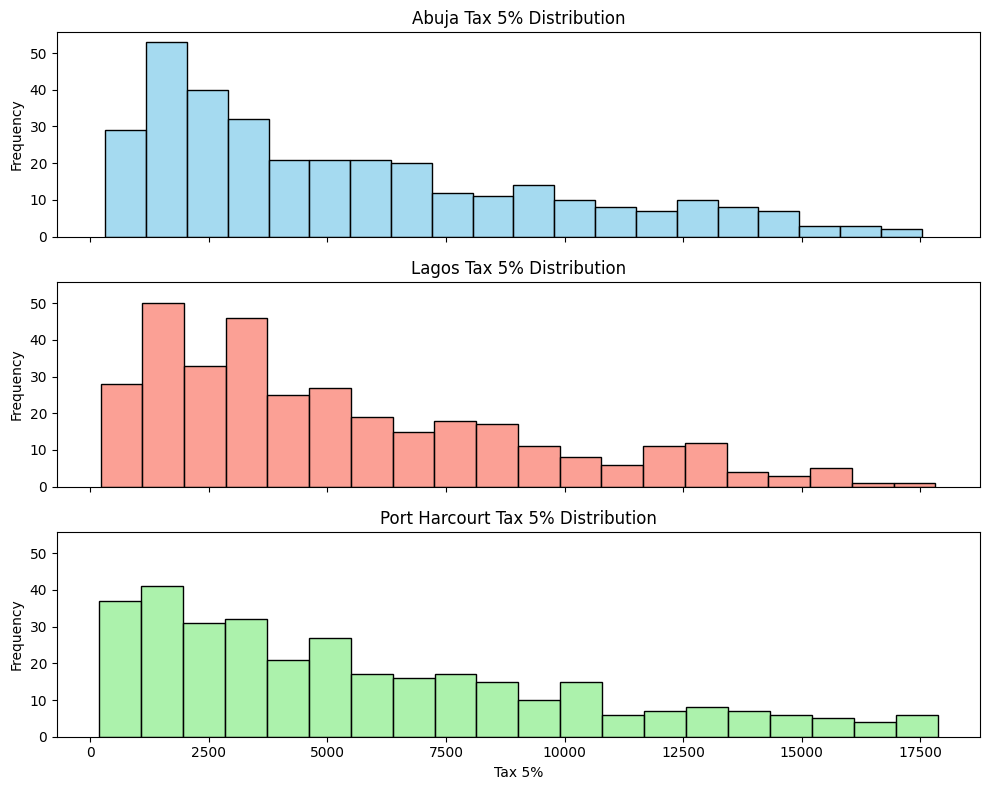

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True, sharey=True)

# Plot a histogram of the 'Tax 5%' column from the Abuja data on the first subplot
sns.histplot(abuja_data['Tax 5%'], color='skyblue', kde=False, bins=20, ax=axes[0])
axes[0].set_title('Abuja Tax 5% Distribution')
axes[0].set_xlabel('Tax 5%')
axes[0].set_ylabel('Frequency')

# Plot a histogram of the 'Tax 5%' column from the Lagos data on the second subplot
sns.histplot(lagos_data['Tax 5%'], color='salmon', kde=False, bins=20, ax=axes[1])
axes[1].set_title('Lagos Tax 5% Distribution')
axes[1].set_xlabel('Tax 5%')
axes[1].set_ylabel('Frequency')

# Plot a histogram of the 'Tax 5%' column from the Port Harcourt data on the third subplot
sns.histplot(port_harcourt_data['Tax 5%'], color='lightgreen', kde=False, bins=20, ax=axes[2])
axes[2].set_title('Port Harcourt Tax 5% Distribution')
axes[2].set_xlabel('Tax 5%')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()



**Observation:** These histograms show the distribution of taxes (5%) of supermarkets in different cities (Abuja, Lagos, and Port Harcourt). Knowing the frequency distribution of Tax 5% values in different cities can provide valuable information for governments, enterprises, and researchers to support them to make more scientific and reasonable judgments in tax policies, business decisions, and economic evaluations. The frequency of high tax ranges (over 15,000) in Lagos is very low, almost none. Port Harcourt data are more evenly distributed and have a lower overall frequency. Abuja tax frequency is concentrated between 0 and 2500 and the highest peak is higher than the other two cities, over 50. **Overall, the trend in taxes reflects a greater diversity in supermarket size and sales in Port Harcourt. In addition, the lower number of high-income supermarkets in Lagos may indicate a highly competitive market with only a few players having high sales, thus requiring market-specific planning. The higher concentration of low-tax supermarkets in Abuja suggests an opportunity to build large stores that can dominate the market.**

### <font size="+2" color='#154085'>**4.1.6 Analyze categorical variable 'Payment' using bar charts**

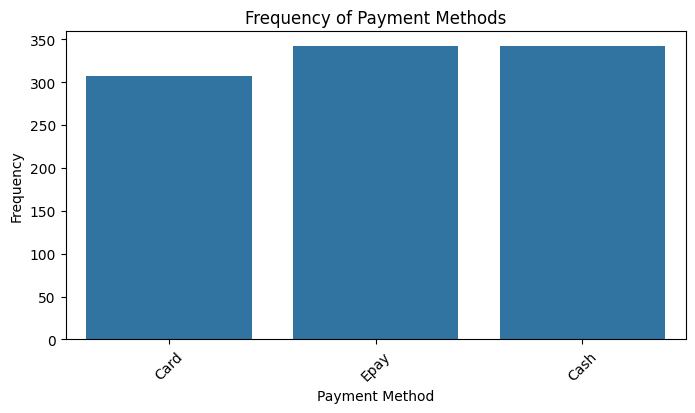

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a copy of the data to avoid modifying the original dataframe
plot_data = combined_data.copy()

# Replace the encoded payment method values with their corresponding labels
plot_data['Payment'] = plot_data['Payment'].replace({0: 'Card', 1: 'Cash', 2: 'Epay'})

plt.figure(figsize=(8, 4))
sns.countplot(x='Payment', data=plot_data)
plt.title('Frequency of Payment Methods')
plt.ylabel('Frequency')
plt.xlabel('Payment Method')
plt.xticks(rotation=45)
plt.show()



**Observation:** This bar chart shows the frequency of different payment methods. The horizontal axis represents the payment method, and the vertical axis represents the frequency of each payment method. Payment method 'Cash' and payment method 'Epay' are used about the same frequency, nearly 350 times. Payment method 'Card' is used slightly less frequently than others, but the difference is not large, and the frequency is around 300 times. **So in this data distribution, the frequency of different payment methods is relatively uniform, and there is no significant difference between the three payment methods. To boost sales, we can further promote the rebate after using 'Cash' and 'Epay' payment methods.**

### <font size="+2" color='#154085'>**4.1.7 Analyze categorical variable 'Gender' using pie charts**

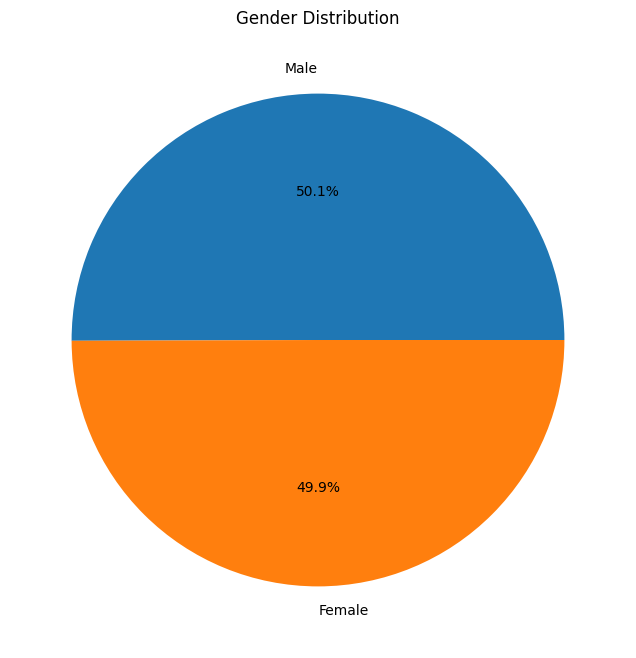

In [ ]:
import matplotlib.pyplot as plt

# Create a copy of the data to avoid modifying the original dataframe
plot_data = combined_data.copy()

# Replace the encoded gender values with their corresponding labels
plot_data['Gender'] = plot_data['Gender'].replace({0: 'Female', 1: 'Male'})

plt.figure(figsize=(8, 8))
plot_data['Gender'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()



**Observation:** We can see that the two parts in the plot are almost equal, with the blue part accounting for 50.1% and the orange part accounting for 49.9%. This indicates that the ratio of males and females is very close in the dataset and the gender distribution is very uniform. **It can be concluded that there is no significant gender bias in this dataset and the ratio of men to women is almost equal.**

### <font size="+2" color='#154085'>**4.2 Bivariate analysis**

### <font size="+2" color='#154085'>**4.2.1 Numerical variable ‘Total' vs numerical variable 'Rating' using scatter plots**

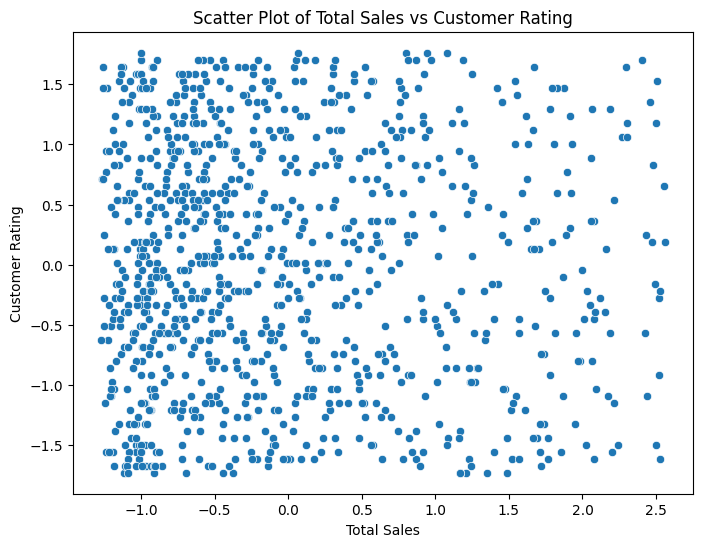

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Total', y='Rating', data=combined_data) # Create a scatter plot for 'Total' vs 'Rating' from 'combined_data'
plt.title('Scatter Plot of Total Sales vs Customer Rating')
plt.xlabel('Total Sales')
plt.ylabel('Customer Rating')
plt.show()


**Observation:** As you can see from this scatter plot, there is a correlation between total sales and customer ratings. The scatter of total sales is relatively dense when negative 1.0-0.5, and sparse when 0.5-2.5. This means that customer ratings are more significant when the total sales are between negative 1.0 and 0.5, although the relationship between the two may be affected by other factors. It can be observed that in the negative 1 to negative 0.5 range of total sales, the density of customer ratings in the upper half is relatively higher. This implies that supermarkets with lower total sales tend to have higher customer ratings and satisfaction. **When analyzing sales performance and customer satisfaction, companies may need to consider other variables, such as product type and marketing strategy, to fully understand the relationship between sales and customer satisfaction.**

### <font size="+2" color='#154085'>**4.2.2 Numerical variable ‘Unit price' vs Numerical variable 'Total' using scatter plots**


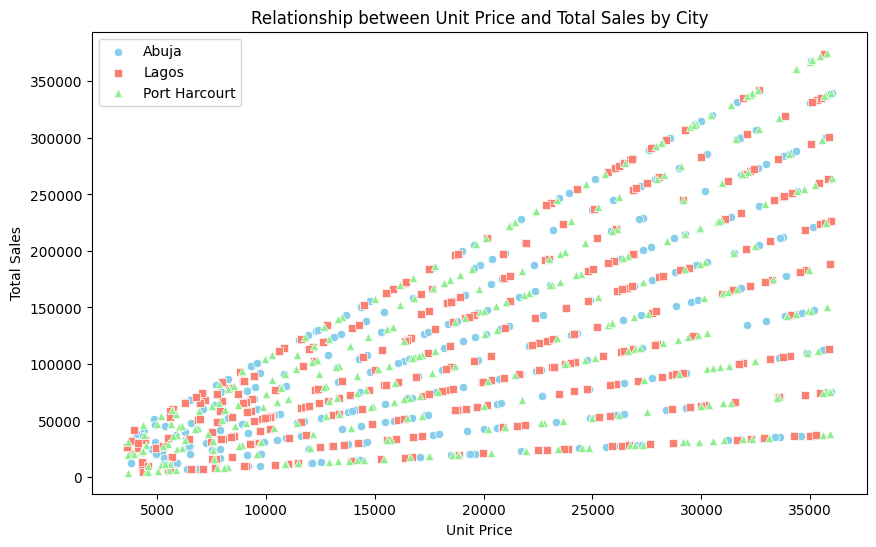

In [ ]:
import matplotlib.pyplot as plt  # Import matplotlib.pyplot for plotting graphs
import seaborn as sns  # Import seaborn for high-level interface for drawing attractive and informative statistical graphics

plt.figure(figsize=(10, 6))  # Set the figure size for the scatter plot
# Create a scatter plot for 'Unit price' vs 'Total' for Abuja using seaborn
sns.scatterplot(x='Unit price', y='Total', data=abuja_data, color='skyblue', label='Abuja', marker='o')
# Create a scatter plot for 'Unit price' vs 'Total' for Lagos using seaborn
sns.scatterplot(x='Unit price', y='Total', data=lagos_data, color='salmon', label='Lagos', marker='s')
# Create a scatter plot for 'Unit price' vs 'Total' for Port Harcourt using seaborn
sns.scatterplot(x='Unit price', y='Total', data=port_harcourt_data, color='lightgreen', label='Port Harcourt', marker='^')

plt.title('Relationship between Unit Price and Total Sales by City')  # Set the title of the plot
plt.xlabel('Unit Price')  # Set the x-axis label
plt.ylabel('Total Sales')  # Set the y-axis label
plt.legend()  # Display a legend to identify the cities

plt.show()  # Display the plot


**Observation:** In this scatter plot, we can clearly see that Unit Price and Total exhibit linear distributions across different tiers. This is due to the formula Total = Unit Price * Quantity + Tax = 1.05 * Unit Price * Quantity, where the slope of each line represents different sales quantity tiers. Overall, the distribution of individual products with different unit prices within various total sales amounts appears fairly even. If we analyze the total sales of different products within the same unit price range, we find that the distribution of product individuals at each total sales tier is also quite uniform. This means that for various products at the same unit price, their sales quantities are evenly distributed across tiers. **Considering this, it could be beneficial to adjust the unit prices of products that have high prices but lower sales quantities, in order to maximize total sales revenue.**

### <font size="+2" color='#154085'>**4.2.3 Categorical variable ‘Payment' vs numerical variable 'Quantity' using bar charts**


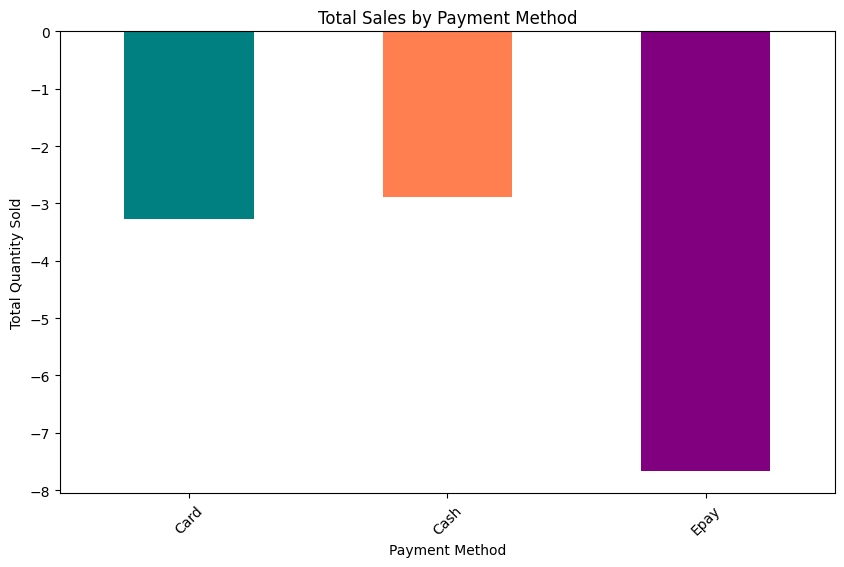

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Mapping payment methods
payment_mapping = {0: 'Card', 1: 'Cash', 2: 'Epay'}
combined_data['Payment'] = combined_data['Payment'].map(payment_mapping)

# Group the data by 'Payment' method and sum the 'Quantity' for each group
payment_sales = combined_data.groupby('Payment')['Quantity'].sum()

# Define colors for each bar
colors = ['teal', 'coral', 'purple']

# Create a bar chart with specified colors
plt.figure(figsize=(10, 6))
payment_sales.plot(kind='bar', color=colors)
plt.title('Total Sales by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()




**Observation:** The chart includes three payment methods: 'Card', 'Cash' and 'Epay', corresponding to three bars. The total sales of each payment method are significantly different. The chart shows that the total sales of payment method 'Cash' is the highest, while the total sales of payment method 'Card' is the lowest. This shows that the payment method has an important impact on the total sales. Considering that the actual frequency of payments among the three methods is not significantly different, the sales revenue associated with the Epay method is the highest, while cash and card are at lower levels. This suggests that customers prefer to use cash and card for lower-priced items, while they tend to choose the more convenient Epay electronic payment method for higher-priced goods. This observation also aligns with real-world scenarios. **Companies can adjust their payment strategies based on this data to optimize sales performance. For example, rebates can be given to customers who consume 'Cash' to promote consumption.**

### <font size="+2" color='#154085'>**4.2.4 Categorical variable ‘Payment' vs categorical variable 'Gender' using stacked bar charts**


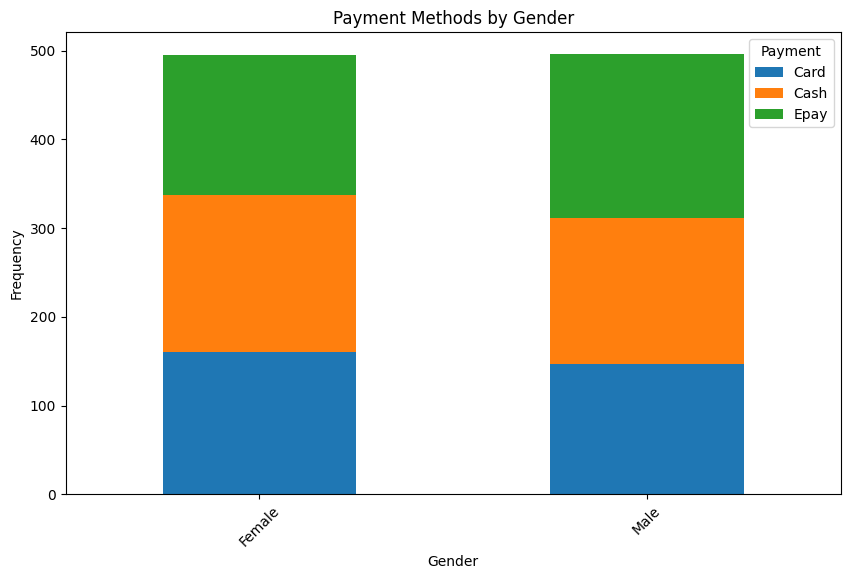

In [ ]:
# Create a cross-tabulation of 'Gender' and 'Payment' to see the frequency of payment methods used by different genders
gender_payment = pd.crosstab(combined_data['Gender'], combined_data['Payment'])
# Plot the crosstab data as a stacked bar chart
gender_payment.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Payment Methods by Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'], rotation=45)
plt.show()




**Observation:** As can be seen from the figure, the frequency of use of the three payment methods is relatively uniform for both men and women. Each payment method is used in a similar proportion among men and women, indicating that there is no significant difference in the choice of payment method between customers of different genders. **However, we notice that the proportion of women using cash payment is slightly higher than that of men. Men are more inclined to use electronic payment. Based on this phenomenon, we can consider promoting cash payment for women and electronic payment for men to increase sales.**

### <font size="+2" color='#154085'>**4.2.5 Categorical variable ‘City' vs categorical variable 'Customer type' using heatmap**


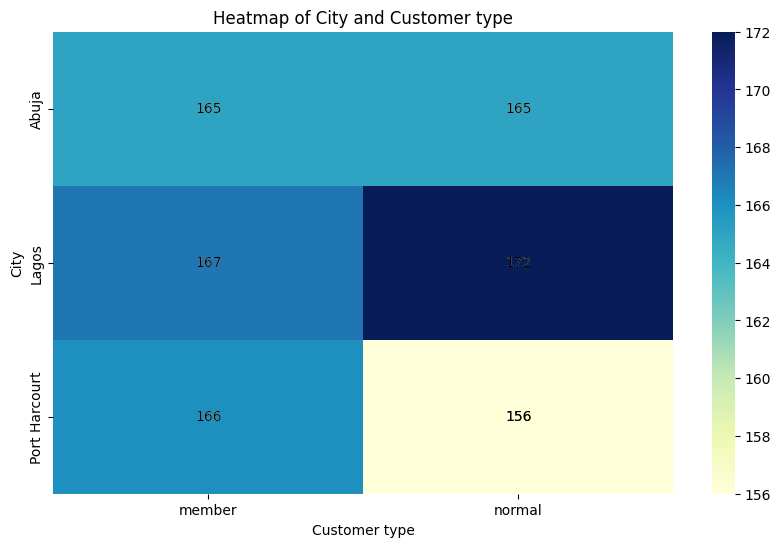

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))

# Group data by 'City' and 'Customer type', count occurrences, unstack for heatmap format, and plot as heatmap
heatmap_data = combined_data.groupby(['City', 'Customer type']).size().unstack()
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='')

# Modify x-axis tick labels
plt.xticks(ticks=[0.5, 1.5], labels=['member', 'normal'])

# Modify y-axis tick labels
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=['Abuja', 'Lagos', 'Port Harcourt'])

plt.title('Heatmap of City and Customer type')

# Add annotations to each cell
for i in range(len(heatmap_data)):
    for j in range(len(heatmap_data.columns)):
        plt.text(j + 0.5, i + 0.5, heatmap_data.iloc[i, j], ha='center', va='center', color='black')

plt.show()





**Observation:** The heatmap shows the distribution of the number of member customers and regular customers in different cities (Abuja, Lagos, Port Harcourt). In Abuja, the number of member and regular customers is the same at 165. This suggests that the membership system of supermarkets may not have significantly affected the distribution of customers in Abuja. In Lagos, there are slightly more regular customers (172) than member customers (167). This indicates that the proportion of general customers in Lagos is relatively high and may require enhanced membership recruitment and promotional activities. In Port Harcourt, there are more members customers (166) than regular customers (156). This indicates that the membership system is more successful in Port Harcourt, with a larger proportion of member customers. **We speculate that the success of the membership program in supermarkets within the city of Port Harcourt is due to the abundance of high-priced, high-end products, primarily in the luxury goods sector. Therefore, the membership system offers greater discounts to customers. Consequently, businesses can learn from the successful experience of the membership program in Port Harcourt supermarkets and apply these strategies to their own membership activities, bringing more revenue and customer loyalty to their supermarkets.**

### <font size="+2" color='#154085'>**4.3 Multivariate analysis**


### <font size="+2" color='#154085'>**4.3.1 Analyze the correlation between 'Total', 'Rating', and 'Quantity' using correlation matrix**

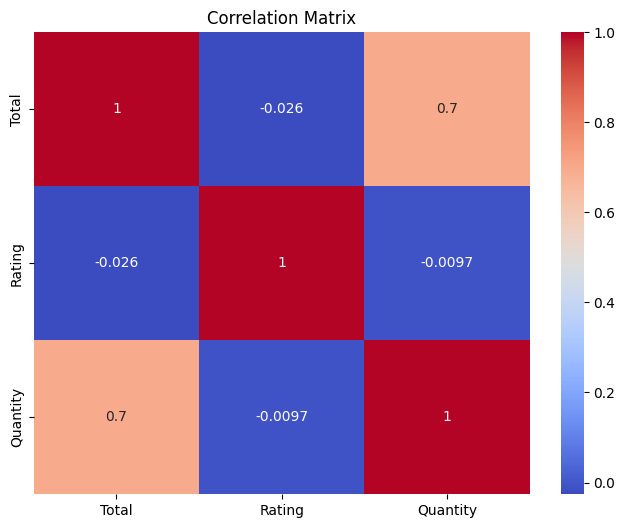

In [ ]:
corr_matrix = combined_data[['Total', 'Rating', 'Quantity']].corr()  # Compute the correlation matrix for specified columns
plt.figure(figsize=(8, 6))  # Set the figure size for the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')  # Plot the correlation matrix using a heatmap with annotations and a 'coolwarm' color map
plt.title('Correlation Matrix')  # Set the title of the heatmap
plt.show()  # Display the heatmap


**Observation:** This figure shows the correlation matrix between Total, Rating, and Quantity.
First, the strong positive correlation (0.7) between total sales and quantity is consistent with expectations in the retail industry, indicating that as the number of purchases increases, total sales increase accordingly, reflecting that sales are usually the product of the number of items and the unit price. However, the relationship between ratings and total sales or quantity is almost zero(-0.026 and -0.0097), suggesting that customer satisfaction or experience does not directly affect their total spending or purchase quantity. **This finding has important implications for retail strategy formulation: although improving customer satisfaction is critical in increasing brand loyalty and driving repeat purchases, it has limited impact on the economic value of a single transaction.**

### <font size="+2" color='#154085'>**4.3.2 Analyze the correlation between 'Unit price', 'Tax 5%', and 'gross income' using correlation matrix**

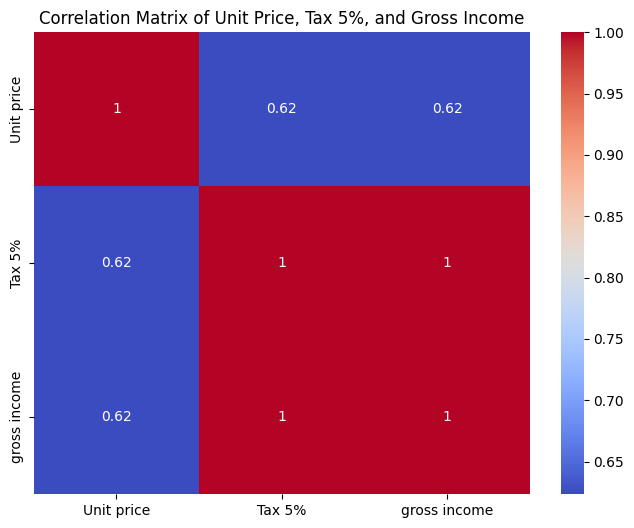

In [ ]:
corr_matrix = combined_data[['Unit price', 'Tax 5%', 'gross income']].corr()  # Compute the correlation matrix for 'Unit price', 'Tax 5%', and 'gross income'

plt.figure(figsize=(8, 6))  # Set the figure size for the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')  # Plot the correlation matrix using a heatmap with annotations and a 'coolwarm' color map
plt.title('Correlation Matrix of Unit Price, Tax 5%, and Gross Income')  # Set the title of the heatmap
plt.show()  # Display the heatmap


**Observation:** The figure shows the correlation matrix between Unit price, Tax 5%, and gross income. The correlation coefficient between unit price and 5% tax is 0.62, meaning that the higher the unit price, the higher the tax. The correlation coefficient between unit price and gross revenue is 0.62, so goods with high unit price usually bring higher gross revenue. The correlation coefficient between the 5% tax and gross income is 1, indicating a fully positive relationship between the two. That's because Total=Unit Price * Quantity+Tax, Tax=Unit Price * Quantity * 5%.

### <font size="+2" color='#154085'>**4.3.3 Analyze the correlation between 'Total', 'Unit price', 'Quantity', and 'Rating' using correlation matrix**

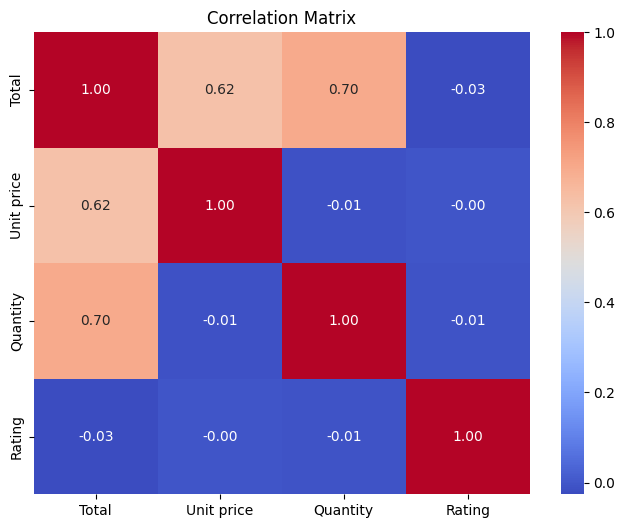

In [ ]:
import seaborn as sns  # Import the seaborn library for visualization

corr = combined_data[['Total', 'Unit price', 'Quantity', 'Rating']].corr()  # Calculate the correlation matrix for 'Total', 'Unit price', 'Quantity', and 'Rating'

plt.figure(figsize=(8, 6))  # Set the figure size for the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")  # Plot the correlation matrix using a heatmap, displaying annotations with two decimal places
plt.title('Correlation Matrix')  # Set the title of the heatmap
plt.show()  # Display the heatmap


**Observation:** It can be seen from the figure that total sales has a positive correlation with both Unit price and Quantity, with correlation coefficients of 0.62 and 0.70, respectively, indicating that an increase in unit price and quantity will lead to an increase in total sales. The correlation coefficient between Unit price and Total sales is 0.62, which indicates a strong positive relationship. The correlation coefficient between Quantity and Total is 0.70, which indicates a strong positive relationship. There is almost no correlation between Unit price and Quantity, with a correlation coefficient of -0.01, which indicates that the linear relationship between these two variables is weak or nonexistent. The correlations between Rating and the other variables are all very low, close to 0, indicating that there is no significant linear relationship between rating and total sales, unit price, and quantity. **Overall, this correlation matrix indicates that total sales are mainly affected by unit price and quantity, while ratings have no significant effect on total sales, unit price and quantity.**

### <font size="+2" color='#154085'>**4.3.4 Visualization of correlation matrices for each variable in the dataset using correlation matrix**

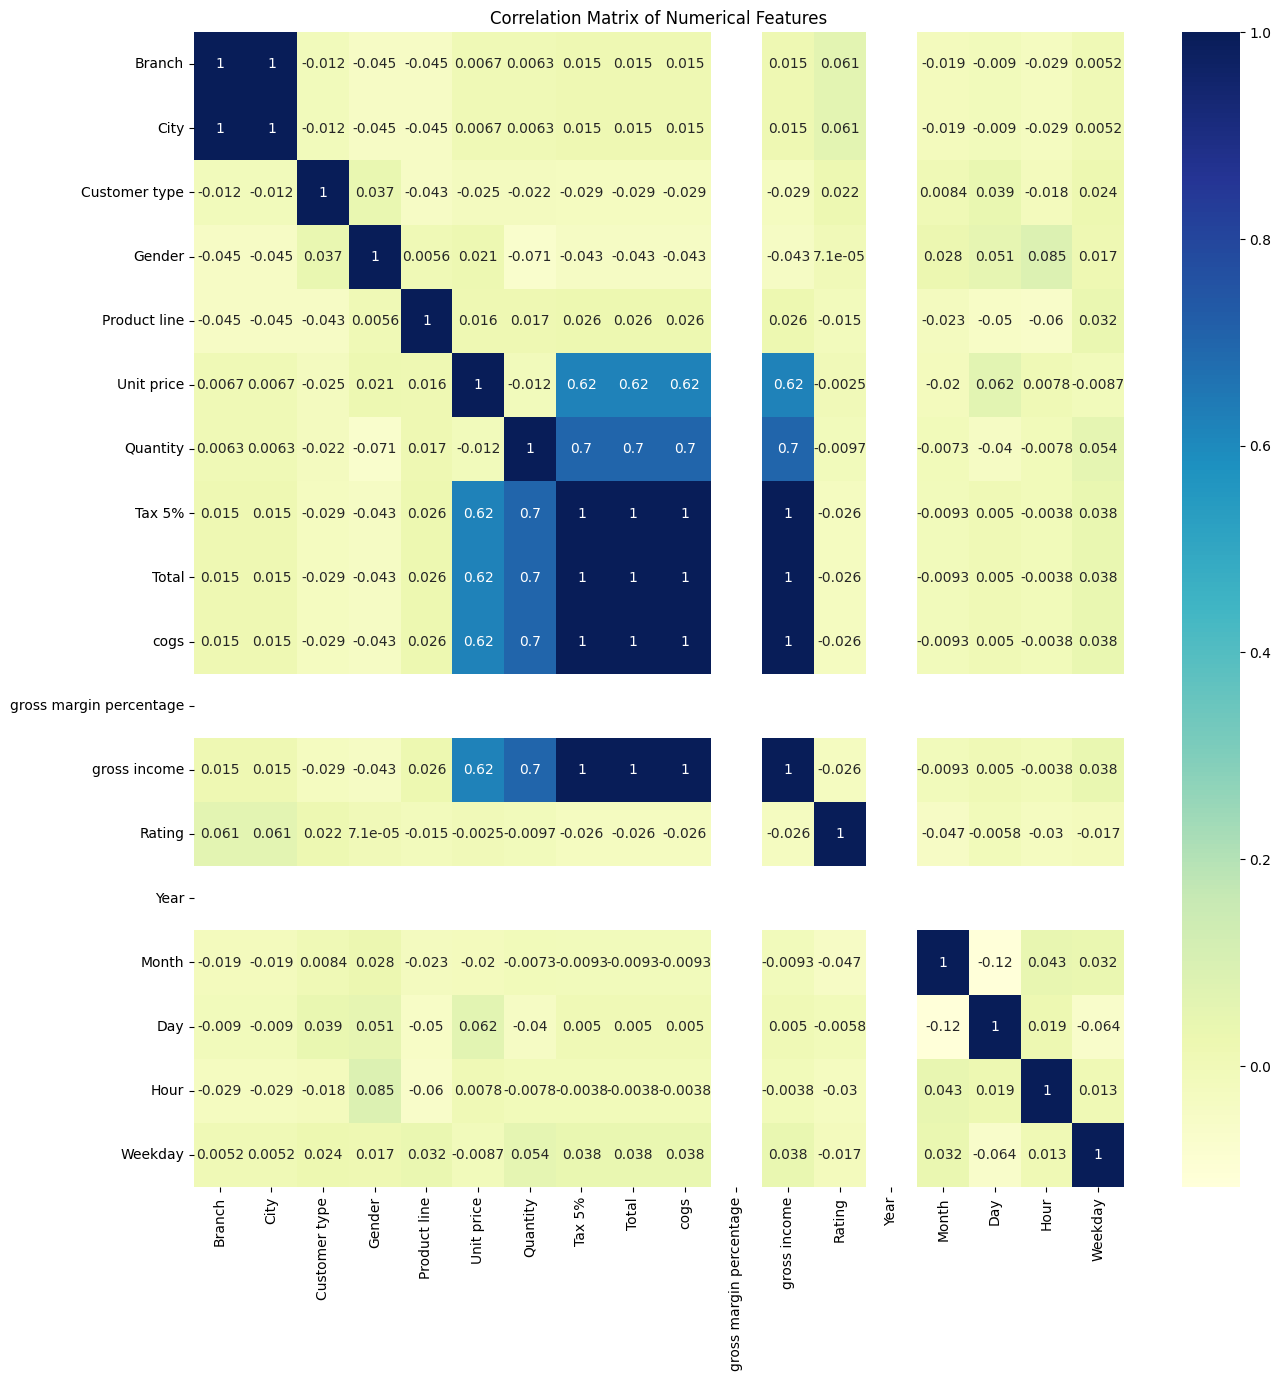

In [ ]:
import seaborn as sns  # Import seaborn for advanced visualization
import matplotlib.pyplot as plt  # Import matplotlib.pyplot for plotting
import pandas as pd  # Import pandas for data manipulation

# Note: You might also need to import numpy for np.number
import numpy as np  # Import numpy for numerical operations

# Select only numerical data types from the combined_data DataFrame
numeric_data = combined_data.select_dtypes(include=[np.number])

# Compute the correlation matrix for the numerical data
correlation_matrix = numeric_data.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(15, 15))  # Set the size of the figure for the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu')  # Plot heatmap with annotations and YlGnBu color map
plt.title('Correlation Matrix of Numerical Features')  # Set the title of the heatmap
plt.show()  # Display the heatmap


**Observation:** The correlation matrix shows the correlation between different numerical variables, and the correlation coefficients range from -1 to 1, where 1 means perfect positive correlation, -1 means perfect negative correlation, and 0 means no linear relationship.

A strong positive correlation between total sales and both quantity (0.7) and unit price (0.62) indicates that these are the primary drivers of total sales, which aligns with typical retail expectations where sales are a product of quantity sold and price per unit. Additionally, there is a perfect correlation (1) between the tax amount, total sales, and the cost of goods sold (COGS), demonstrating that tax calculations are accurately tied to these fundamental financial metrics.

### <font size="+2" color='#154085'>**4.4 Generate interactive charts to help further understand data**

### <font size="+2" color='#154085'>**4.4.1 Analyze the correlation between 'Total' and 'Rating'  using normalized 'Quantity' as the size parameter**



In [ ]:
import plotly.express as px  # Import plotly.express for interactive plots
from sklearn.preprocessing import MinMaxScaler  # Import MinMaxScaler for scaling data

# Check if 'Quantity normalized' column already exists in the DataFrame
if 'Quantity normalized' not in combined_data.columns:
    min_max_scaler = MinMaxScaler()  # Create a MinMaxScaler object
    # Scale the 'Quantity' column to range between 0 and 1 and create a new column for it
    combined_data['Quantity normalized'] = min_max_scaler.fit_transform(combined_data[['Quantity']])

# Create an interactive scatter plot
fig = px.scatter(combined_data, x='Total', y='Rating', color='Gender', size='Quantity normalized',
                 hover_data=['Invoice ID'], title='Interactive Total Sales vs Customer Rating')
fig.show()  # Display the interactive plot


**Observation:** This chart shows the relationship between Total sales and customer Rating, color-coded by Gender. The bubble size in the plot represents "Quantity normalized." The analysis concluded that the distribution of total sales and customer ratings is relatively wide, and there is no obvious linear relationship. This suggests that there may not be a significant correlation between total sales and customer ratings. Color coding shows no significant pattern of gender in the distribution of total sales and customer ratings. Overall, this plot shows that there is no clear correlation between total sales and customer ratings, and gender factor does not have a significant effect in this relationship.

Meanwhile, it can be observed that the smaller bubbles, which represent a lower quantity of sales, are mainly concentrated in areas with lower total sales. This reflects the linear correlation previously analyzed. Additionally, there is a higher density of bubbles on the left side, which corresponds to the previous analysis that customers are more willing to rate lower-priced products.

### <font size="+2" color='#154085'>**4.4.2 Analyze the correlation between 'Unit price' and 'Tax 5%'  using normalized 'Quantity' as the size parameter**


In [ ]:
import plotly.express as px  # Import plotly.express for creating interactive plots
from sklearn.preprocessing import MinMaxScaler  # Import MinMaxScaler for data normalization

# Check if the 'Quantity normalized' column exists in the DataFrame
if 'Quantity normalized' not in combined_data.columns:
    min_max_scaler = MinMaxScaler()  # Initialize the MinMaxScaler
    # Normalize 'Quantity' and add it as a new column to the DataFrame
    combined_data['Quantity normalized'] = min_max_scaler.fit_transform(combined_data[['Quantity']])

# Create an interactive scatter plot of Unit Price vs Tax 5%
fig = px.scatter(combined_data, x='Unit price', y='Tax 5%', color='Gender', size='Quantity normalized',
                 hover_data=['Invoice ID'], title='Interactive Unit Price vs Tax 5%')
fig.show()  # Display the interactive plot


**Observation:** There is a significant positive relationship between unit price and tax amount. As the unit price increases, the tax increases accordingly, which is in line with the setting that the tax is 5% of the unit price. Gender has no obvious effect on the distribution of unit prices and taxes. The mixture of purple and yellow bubbles is distributed throughout the graph, and there is no obvious clustering. The size of the bubble indicates the quantity standardization, and the size change is not significant, indicating that the standardized value of the quantity also has no significant effect between the unit price and the tax amount. **In general, this graph shows that there is a significant positive relationship between unit price and tax amount, and gender does not have a significant effect on the relationship between the two.**

In [ ]:
import plotly.express as px  # Import plotly.express for creating interactive visualizations
from sklearn.preprocessing import MinMaxScaler  # Import MinMaxScaler for scaling numeric data

# Check if the 'Quantity normalized' column does not exist in the DataFrame
if 'Quantity normalized' not in combined_data.columns:
    min_max_scaler = MinMaxScaler()  # Initialize the MinMaxScaler object
    # Apply MinMaxScaler to the 'Quantity' column and create a new normalized column in the DataFrame
    combined_data['Quantity normalized'] = min_max_scaler.fit_transform(combined_data[['Quantity']])

# Create an interactive scatter plot comparing Unit Price vs Product Line
fig = px.scatter(combined_data, x='Unit price', y='Product line', color='Gender', size='Quantity normalized',
                 hover_data=['Invoice ID'], title='Interactive Unit Price vs Product Line')
fig.show()  # Display the interactive plot


**Observation:**The range of unit prices varies from product line to product line, but as a whole, there is no significant overlap of unit prices between product lines. This indicates that each product line has its specific range in price. Colors ranging from dark blue (males) to bright yellow (females) show the gender distribution. It can be seen that in all product lines, male and female purchasing behaviors are relatively uniform, and there is no obvious gender preference in the distribution of prices. The size of the circle indicates the normalized quantity (i.e., the number of purchases), with a larger circle indicating a higher number of purchases. It can be seen that the high purchase quantity of each product line is distributed in different price ranges, showing the difference in purchase quantity among customers of different product lines.

### <font size="+2" color='#154085'>**4.5 Customer behavior prediction for customer type**


Accuracy: 0.47738693467336685
              precision    recall  f1-score   support

           0       0.47      0.48      0.47        98
           1       0.48      0.48      0.48       101

    accuracy                           0.48       199
   macro avg       0.48      0.48      0.48       199
weighted avg       0.48      0.48      0.48       199



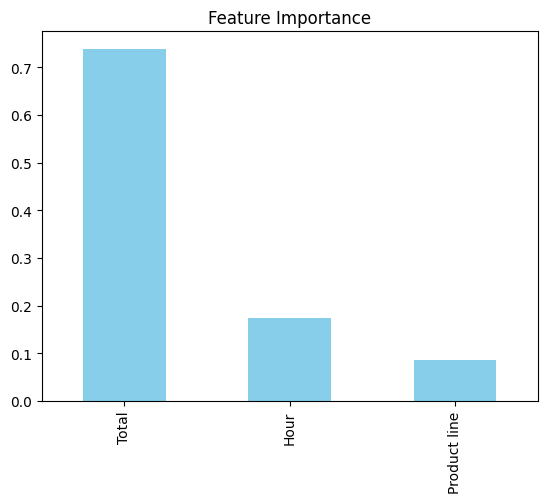

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Extract the hour from the 'Time' column and add it as a new column 'Hour'
combined_data['Hour'] = pd.to_datetime(combined_data['Time']).dt.hour
# Encode the 'Product line' column using label encoding to convert categorical variables into numerical values
encoder = LabelEncoder()
combined_data['Product line'] = encoder.fit_transform(combined_data['Product line'])
# Select features and target variable
X = combined_data[['Total', 'Hour', 'Product line']]
y = encoder.fit_transform(combined_data['Customer type'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a Random Forest classifier model and train it
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
# Predict on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
#Calculate the accuracy of the model and print the classification report
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
# Calculate and visualize feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Feature Importance')
plt.show()



**Observation:** This plot shows the importance scores of the different features by the random forest classifier. Total: This feature has the highest importance with a score of nearly 0.75. This indicates that the total purchase amount is the most important feature for predicting the customer type. It may be because the total purchase amount can well reflect the customer's spending power and buying habits, and thus affect the customer type. Hour: This feature has an importance score of approximately 0.15 Although less important than the total purchase amount, the time of purchase (hours) also has an impact on predicting the customer type. The purchase behavior may vary between time periods, for example, the purchase behavior during the day and at night may reflect different customer segments. Product line: This feature has the lowest importance score, close to 0.1. This indicates that the product line has a relatively small impact on predicting customer types. Although product type will also have some influence on customer type, its influence is smaller than the total purchase amount and purchase time. So the total purchase amount is the most important feature and has the greatest impact on the prediction of customer type. Purchase time also plays a role in predicting customer type, but it is less important than the total purchase amount. The product line has the least impact.

## <font size="+2" color='#154085'> <b>5:  Insights and Recommendations:



**Content of work**：


This project introduces and analyzes a dataset from a supermarket chain, covering data preprocessing, exploratory data analysis (EDA), and advanced visualization. We first analyzed the sources, structure and main fields of the dataset and then loaded and merged the data from the three branches: Abuja, Lagos, Port Harcourt to initialize the data organization. In the exploratory data analysis part, we carried out univariate, bivariate and multivariate analysis, selected important univariate and multiple pairs of variables that may affect each other for analysis, and used bar charts, pie charts and correlation matrices, hoping to further explore the supermarket data of the three cities and provide help for supermarket decision-making.
In addition, we conducted time series analysis and heat map analysis, hoping to find out whether there is an important impact of exploration and time on the data changes in the day and month time nodes.
Finally, Plotly was used to create interactive charts, which enhanced the dynamic and interactive display of data. We hope that these data analyses can show the specific data situation of the current project and help users.

**Key Findings:**

*   The three branches of the dataset (Lagos,
Abuja, and Port Harcourt) perform differently in terms of sales volume and customer engagement. Despite the lowest number of transactions, the Port Harcourt branch had the highest total sales, with Lagos (Branch A) having a total of 38,232,133.38 sales and 340 transactions. Total sales in Abuja (Branch B) were 38,231,161.92 with 332 transactions.
Port Harcourt (Branch C) had a total of 39,804,734.34 sales and 328 transactions.This may indicate that the Port Harcourt branch has higher average sales or higher single sales in customer purchase decisions, possibly due to higher purchasing power or purchase preferences of consumers in its location. In contrast, total sales at the Lagos and Abuja branches were slightly lower than at the Port Harcourt branch, despite higher transaction volumes. This may indicate that the Lagos and Abuja branches are more active in terms of customer engagement and transaction volume, but average sales are lower.


*   High sales are concentrated in Port Harcourt: The Port Harcourt branch has the highest total sales and its sales performance is significantly better than Abuja and Lagos. This suggests that the Port Harcourt branch's operating strategy may be more effective.
*   Effect of payment method on the number of sales: the largest number of sales were made using payment method 2 (electronic payment), while the least number of sales were made using payment method 1 (cash payment). This indicates that e-payment is more popular among consumers.











**Patterns and Trends:**



*   Temporal fluctuation of sales: As can be seen from the graph of the distribution of sales by hour, the fluctuation of sales in different time periods is large. The sales peak is mainly concentrated at 2 PM and 7 PM, and these time periods are likely to be more frequent for customer purchasing activity.



*   We notice that sales increase significantly in specific time periods, especially in the following time periods: 11:00 to 14:00. This may be due to the fact that local residents spend more time shopping before and after lunch. Sales also increase significantly during 17:00 to 19:00 time period, probably because local residents spend more time shopping before and after dinner. Given the above analysis of sales time periods, we can consider conducting promotions during these peak hours to further increase sales: conducting promotions between 11:00 and 14:00 can attract more customers to shop around lunch. The promotion between 17:00 and 19:00 can attract more customers to shop before and after dinner.







**Correlations and Relationships:**


*  Total sales and customer ratings: The data points are widely dispersed across the graph, showing no clear trend of strong positive or negative correlation. There is no evident linear relationship between total sales and customer ratings, indicating that higher or lower sales do not directly determine the level of customer satisfaction. This also suggests that customer satisfaction is influenced by multiple factors, not just sales volume.


*   Strong correlation between unit price and total sales: There is a clear linear relationship between unit price and total sales in each city. The increase in unit price will significantly increase the total sales.

*   Correlation between unit price and 5% tax: The correlation coefficient between unit price and 5% tax is 0.62, indicating that higher unit prices generally lead to higher taxes.
*   Correlation between total amount and quantity: The correlation coefficient between total amount and quantity is 0.7, indicating a strong positive relationship between the two.



**Outliers and Anomalies:**



*  We conducted outlier detection and analysis on
the original data. We found that the distribution of Unit price is relatively uniform, with a few outliers, but the range is not large; the distribution of Quantity is also relatively uniform, with some upper outliers; Tax distribution has some upper outliers; the Total column has many upper outliers; the distribution of cogs is similar to Total, with some upper outliers; gross margin percentage has almost no outliers and appears as a single line; Rating has some upper outliers, but not many.



*  After handling the outliers, the distribution of Quantity has become more compact; the distribution of Tax has become more uniform; the range of the Total column has shrunk after handling outliers, making the data more concentrated; the distribution of cogs has become more compact; gross margin percentage has almost no change, as there were no outliers originally; the distribution of Rating has become narrower.



* Overall, by removing outliers in this report, the data distribution has become more uniform and compact, and extreme values have been excluded, making our analysis results more reliable. The processed data is more suitable for modeling and further analysis, which helps to improve the accuracy and stability of the models.

**Segmentation Analysis:**


*   Influence of gender on payment methods: There is little difference between male and female customers in choosing payment methods, and the frequency of use of each payment method is similar.
*   Cluster analysis of customer type: By clustering the data by customer type, it is found that the average purchase volume and total purchase amount of member customers are higher than that of non-member customers. This indicates that member customers contribute more to the company and should increase the efforts of member recruitment and maintenance.



* The gender breakdown shows that women buy slightly more overall than men, especially in the health and beauty category.
In terms of payment methods, it can be seen that electronic payment is more popular than cash payment, which further reflects the trend of digital transactions.

**Predictive Insights:**




*  For customer behavior model analysis, three features can be obtained: total, Hour and Product line. Among them, total sales is the most important feature, far outperforming the other two features, which indicates that total sales plays a decisive role in predicting the type of customer (e.g., member vs. non-member). The importance of total feature is much higher than other features, accounting for more than 0.6, indicating that total sales is a key factor in determining customer types. The low importance of hour feature indicates that purchase time has limited contribution to distinguishing customer types. Product line
The feature has the lowest importance, which indicates that the product line has less influence on predicting the customer type. The kinds of products customers choose may have little to do with whether they are members or not.

**Business Implications:**



*   Stock Management: Aligning stock levels to predicted high-sales periods can reduce out-of-stock situations and optimize inventory turnover.




*   Improving successful strategies at the Port Harcourt branch: Analyzing the successful strategies at the Port Harcourt branch and promoting them at other branches may help to improve the overall sales performance.
*   Optimize payment methods: Since electronic payment is more popular among customers, the company can consider promoting more electronic payment methods to increase the number of sales.


*   Maintenance of member customers: Since the purchase volume and total purchase amount of member customers are high, the company should increase the maintenance and incentive of member customers to improve their loyalty.
*   Time period promotion strategy: Based on peak sales periods such as 2 PM and 7 PM, the company can develop targeted promotions to maximize sales.



